# Effective Graph Paper
Code to generate "Figure 5 - Thaliana Perturbations"

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.gridspec as gridspec
import cana
from cana.datasets.bio import THALIANA
import matplotlib.pyplot as plt

In [3]:
T = THALIANA()
df = pd.read_csv("ThalianaPerturbationCorrelation.csv")

In [4]:
nodes = {i: n.name for i, n in enumerate(T.nodes)}

In [5]:
df['Name'] = df['Node'].map(nodes)

In [7]:
dfe = df.loc[df['Graph'] == 'EG', :]
dfi = df.loc[df['Graph'] == 'IG', :]

In [8]:
# Pivot
dfip = dfi.pivot(index='Step', columns='Name', values='Correlation')
dfep = dfe.pivot(index='Step', columns='Name', values='Correlation')

In [11]:
# Diff, Sort, and Order
diff = (dfep - dfip).sum(axis='index').sort_values(ascending=True)
display(diff)
# List ORder
order = diff.index.tolist()
# Move FUL to end of list
order.insert(len(order), order.pop(3))
display(order)
#
dfip = dfip.loc[:, order]
dfep = dfep.loc[:, order]
#
display(dfep)

Name
FT     -1.163439
AP1    -0.396575
EMF1   -0.007981
FUL     0.000000
PI      0.000000
AP3     0.000000
UFO     0.047345
LFY     0.054197
TFL1    1.046622
AG      3.326015
SEP     6.918258
WUS     7.564383
AP2     7.835093
CLF     8.441326
LUG     8.441326
dtype: float64

['FT',
 'AP1',
 'EMF1',
 'PI',
 'AP3',
 'UFO',
 'LFY',
 'TFL1',
 'AG',
 'SEP',
 'WUS',
 'AP2',
 'CLF',
 'LUG',
 'FUL']

Name,FT,AP1,EMF1,PI,AP3,UFO,LFY,TFL1,AG,SEP,WUS,AP2,CLF,LUG,FUL
Step,,,,,,,,,,,,,,,
1,1.000000,0.704416,1.000000,0.731925,0.731925,0.627364,0.987368,0.998733,0.832869,1.000000,0.627364,1.000000,1.000000,1.000000,NaN
2,0.716316,0.453731,0.341395,0.627364,0.731925,0.716316,0.241701,0.389291,0.650210,0.889569,0.696084,0.604993,0.770588,0.770588,NaN
3,0.648311,0.332252,0.683022,0.731925,0.627364,0.716316,0.520588,0.503292,0.500238,0.862521,0.712413,0.682415,0.863536,0.863536,NaN
4,0.202397,0.510204,0.676982,0.731925,0.627364,0.716316,0.782556,0.633669,0.442189,0.743917,0.579098,0.784157,0.788974,0.788974,NaN
5,0.316609,0.608865,0.567791,0.731925,0.627364,0.716316,0.726288,0.703185,0.515351,0.762968,0.574960,0.778301,0.774722,0.774722,NaN
6,0.552841,0.803724,0.706685,0.731925,0.627364,0.716316,0.654972,0.589128,0.696002,0.729444,0.636085,0.788811,0.785184,0.785184,NaN
7,0.595768,0.611409,0.547415,0.731925,0.627364,0.716316,0.586453,0.682232,0.628392,0.692275,0.636085,0.788811,0.785184,0.785184,NaN
8,0.303925,0.790680,0.551158,0.731925,0.627364,0.716316,0.586453,0.678426,0.577442,0.703875,0.597832,0.788811,0.785184,0.785184,NaN
9,0.449290,0.778218,0.562928,0.731925,0.627364,0.716316,0.594530,0.673364,0.599719,0.703875,0.606656,0.788811,0.785184,0.785184,NaN


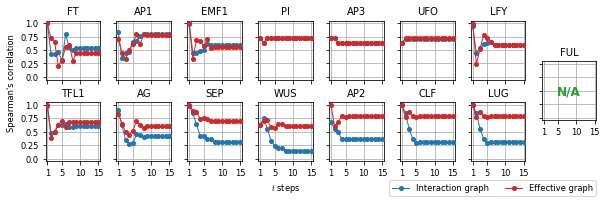

In [15]:
fig = plt.figure(figsize=(8.5, 2.8))
gs = gridspec.GridSpec(ncols=8, nrows=5, figure=fig)

# first row
axes = []
axes.append(fig.add_subplot(gs[0:2, 0:1]))
axes.append(fig.add_subplot(gs[0:2, 1:2]))
axes.append(fig.add_subplot(gs[0:2, 2:3]))
axes.append(fig.add_subplot(gs[0:2, 3:4]))
axes.append(fig.add_subplot(gs[0:2, 4:5]))
axes.append(fig.add_subplot(gs[0:2, 5:6]))
axes.append(fig.add_subplot(gs[0:2, 6:7]))
# second row
axes.append(fig.add_subplot(gs[2:4, 0:1]))
axes.append(fig.add_subplot(gs[2:4, 1:2]))
axes.append(fig.add_subplot(gs[2:4, 2:3]))
axes.append(fig.add_subplot(gs[2:4, 3:4]))
axes.append(fig.add_subplot(gs[2:4, 4:5]))
axes.append(fig.add_subplot(gs[2:4, 5:6]))
axes.append(fig.add_subplot(gs[2:4, 6:7]))
# last (FUL)
axes.append(fig.add_subplot(gs[1:3, 7:8]))


xs = np.arange(1, 21, 1)
for (node, si), (_, se), ax in zip(dfip.iteritems(), dfep.iteritems(), axes):
    pi, = ax.plot(xs, si, c='#1f77b4', label='Interaction Graph', marker='o', ms=4, lw=1, ls='-', zorder=5)
    pe, = ax.plot(xs, se, c='#d62728', label='Effective Graph',marker='o', ms=4, lw=1, ls='-', zorder=6)
    
    ax.set_title(node, fontsize='medium')
    ax.set_xlim(0.5,15.5)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([1,5,10,15])
    ax.set_xticklabels([])
    ax.set_yticks([0.0,0.25,0.5,0.75,1.0])
    ax.set_yticklabels([])
    #ax.axhline(0, color='black', zorder=2)
    ax.grid(zorder=1)
    ax.set(aspect='auto')

# xticks
for ax in axes[7:15]:
    ax.set_xticklabels([1,5,10,15], fontsize='small')
# yticks
for ax in [axes[0], axes[7]]:
    ax.set_yticklabels([0.0,0.25,0.5,0.75,1.0], fontsize='small')

# Labels
axes[7].set_ylabel("Spearman's correlation", ha='left', fontsize='small')
axes[10].set_xlabel(r'$t$ steps', fontsize='small')

axes[14].text(x=.5, y=.5, s='N/A', ha='center', va='center', transform=axes[14].transAxes, fontsize='large', color='#2ca02c', weight='bold')

# Legend
plt.legend(handles=[pi, pe], labels=['Interaction graph', 'Effective graph'],
   loc='lower right', bbox_to_anchor=(1.07,-1.35), ncol=2, fontsize='small')

#plt.tight_layout()
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.0, top=0.90, wspace=0.30, hspace=1.25)
plt.savefig("ThalianaPerturbations.pdf", padding=0)
plt.show()